# Cleaned Dataset

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import sanity_checks_methods
import ML_algorithms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

In [2]:
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22760,0.0,34.0,0,0,1,3,0,83.57,24.5,0,0
35865,0.0,48.0,1,0,1,2,1,69.94,33.3,1,0
24608,1.0,58.0,0,0,1,4,0,69.24,26.6,0,0
26877,1.0,25.0,0,0,0,2,1,160.76,30.2,1,0
29623,1.0,51.0,0,0,0,4,1,80.55,23.5,1,0
29557,0.0,90.0,0,0,1,4,0,207.84,38.9,0,0
38083,1.0,47.0,1,0,1,3,1,107.21,27.0,1,0
24646,1.0,69.0,0,1,1,4,1,208.05,35.3,1,0
30964,1.0,21.0,1,0,0,4,1,71.22,40.0,0,0
33339,0.0,25.0,0,0,1,2,0,97.40,44.6,1,0


In [3]:
num_features = df.shape[1]
num_data_points = df.shape[0]

print("Number of features in the dataset: ", num_features)
print("Number of data in dataset: ", num_data_points)

Number of features in the dataset:  11
Number of data in dataset:  10000


## Sanity checks

In [4]:
sanity_checks_methods.max_min_commonValue(df)

BMI
min value:14.1
max value: 78.0
max common value: 31.4

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39



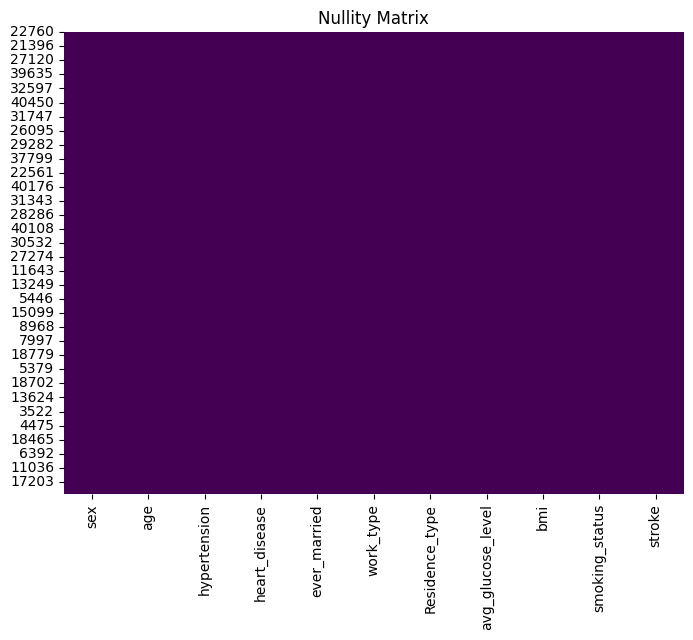

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Matrix')
plt.show()

#### Dropping null values

Print null and duplicates values before removing them. After show operation results

In [6]:
sanity_checks_methods.print_null_values(df)
df = sanity_checks_methods.drop_null_values(df)
df.drop_duplicates(inplace=True)
sanity_checks_methods.print_null_values(df)

total rows: 10000
Null Value Counts:
sex                  1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.01
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.00
smoking_status       0.00
stroke               0.00
dtype: float64

Feature: sex
Null Count: 1
Null Percentage: 0.01%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Count: 0
Null Percentage: 0.00%

Feature: Residence_type
Nul

#### Dropping outliers 

no outliers detected for feature age
no outliers detected for feature avg_glucose_level

 outliers detected for frature bmi


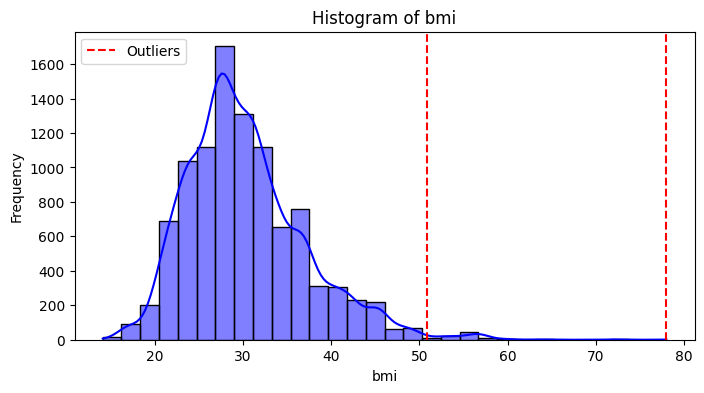

no outliers detected for feature age
no outliers detected for feature avg_glucose_level
no outliers detected for feature bmi


In [7]:
sanity_checks_methods.visualize_outliers(df)
df = sanity_checks_methods.drop_outliers(df)
sanity_checks_methods.visualize_outliers(df)

#### Dropping negative values for features BMI, age and avg_glucose_level

In [8]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)
    
for feature in numerical_features:  
    df = sanity_checks_methods.drop_negative_values(df, feature)
    
for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

In [9]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    df_cleaned = sanity_checks_methods.drop_negative_values(df, feature)
    sanity_checks_methods.check_negative_values(df_cleaned, feature)

correct values in age feature
correct values in avg_glucose_level feature
correct values in bmi feature


#### Dropping invalid age 

##### Dropping invalid age married

In [10]:
sanity_checks_methods.check_age_married_consistency(df)

number of incosistencies: 

404


In [11]:

df = sanity_checks_methods.drop_inconsistencies(df)

## EDA ON ORIGINAL DATASET

### Categorical features frequencies

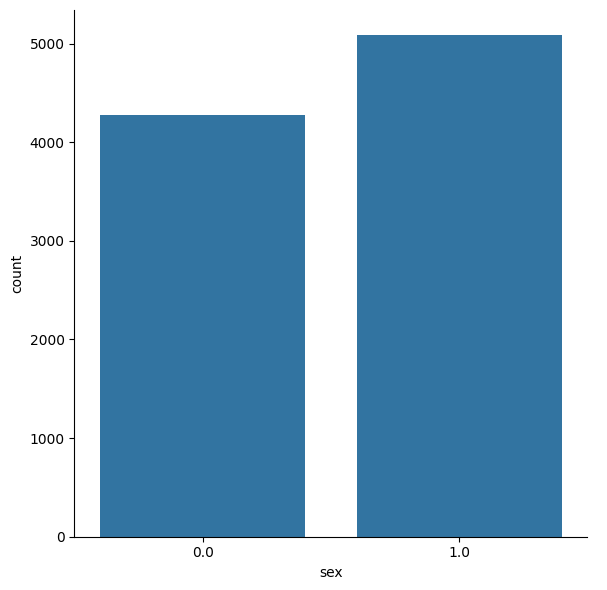

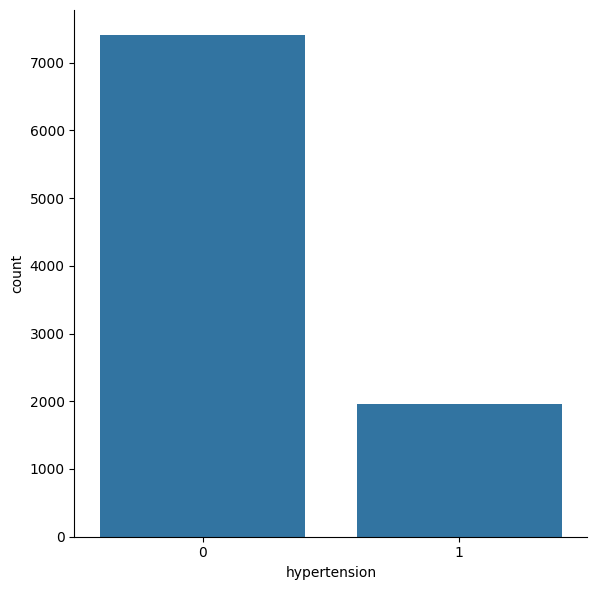

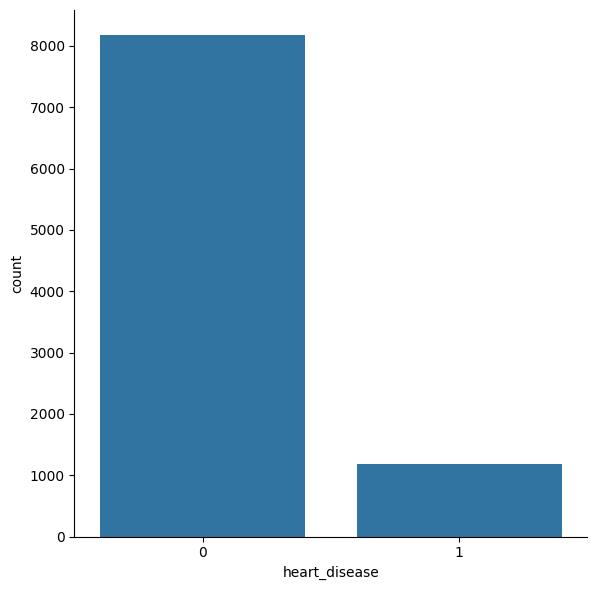

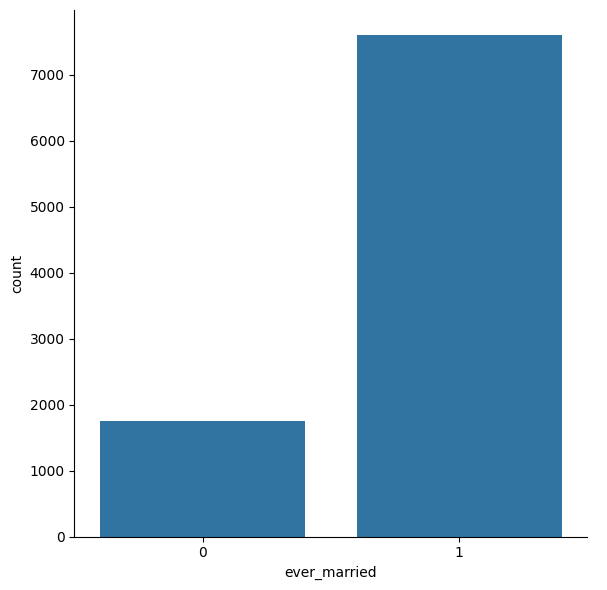

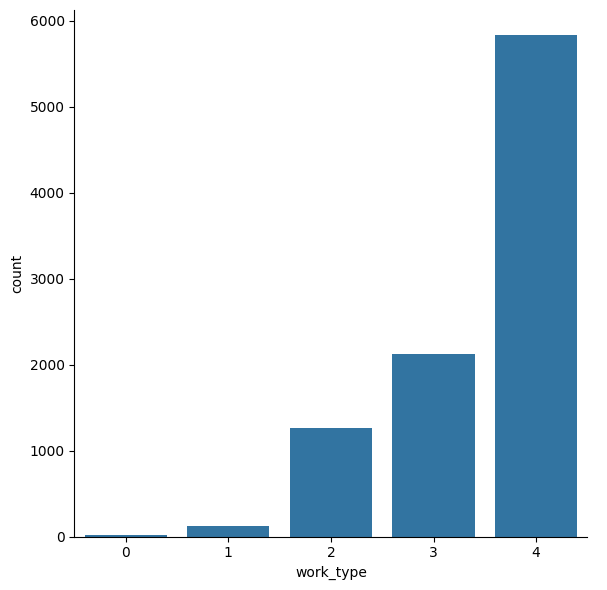

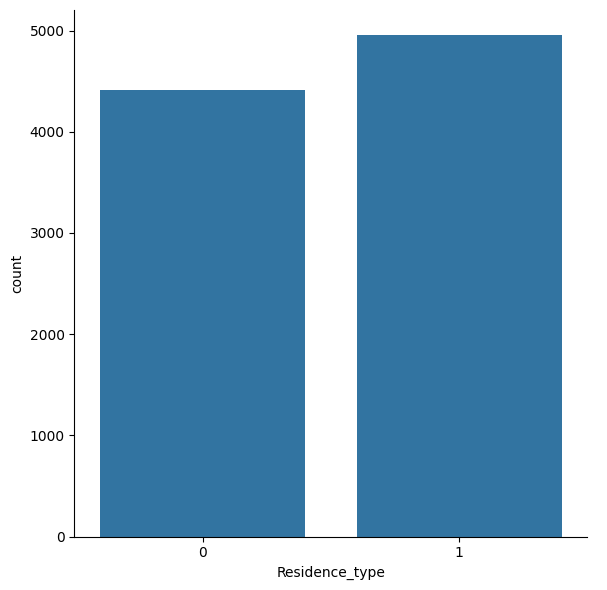

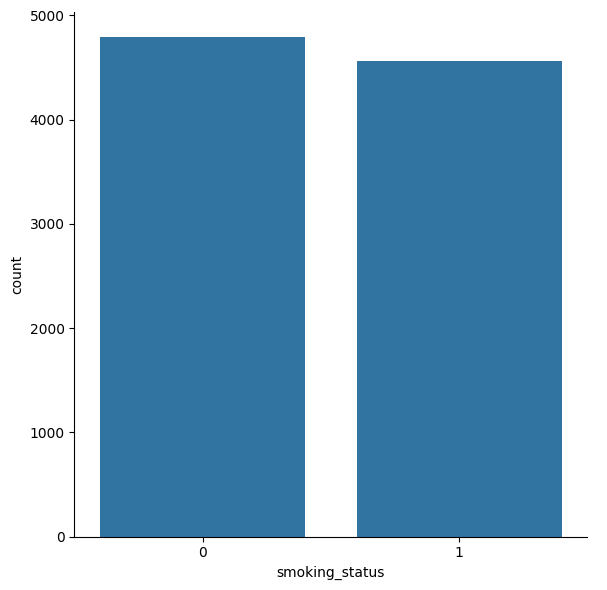

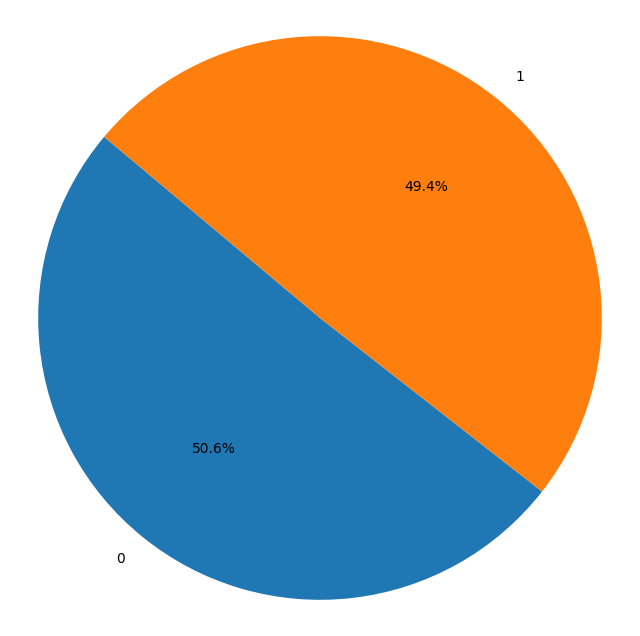

In [12]:
categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()

### Numerical features distribution

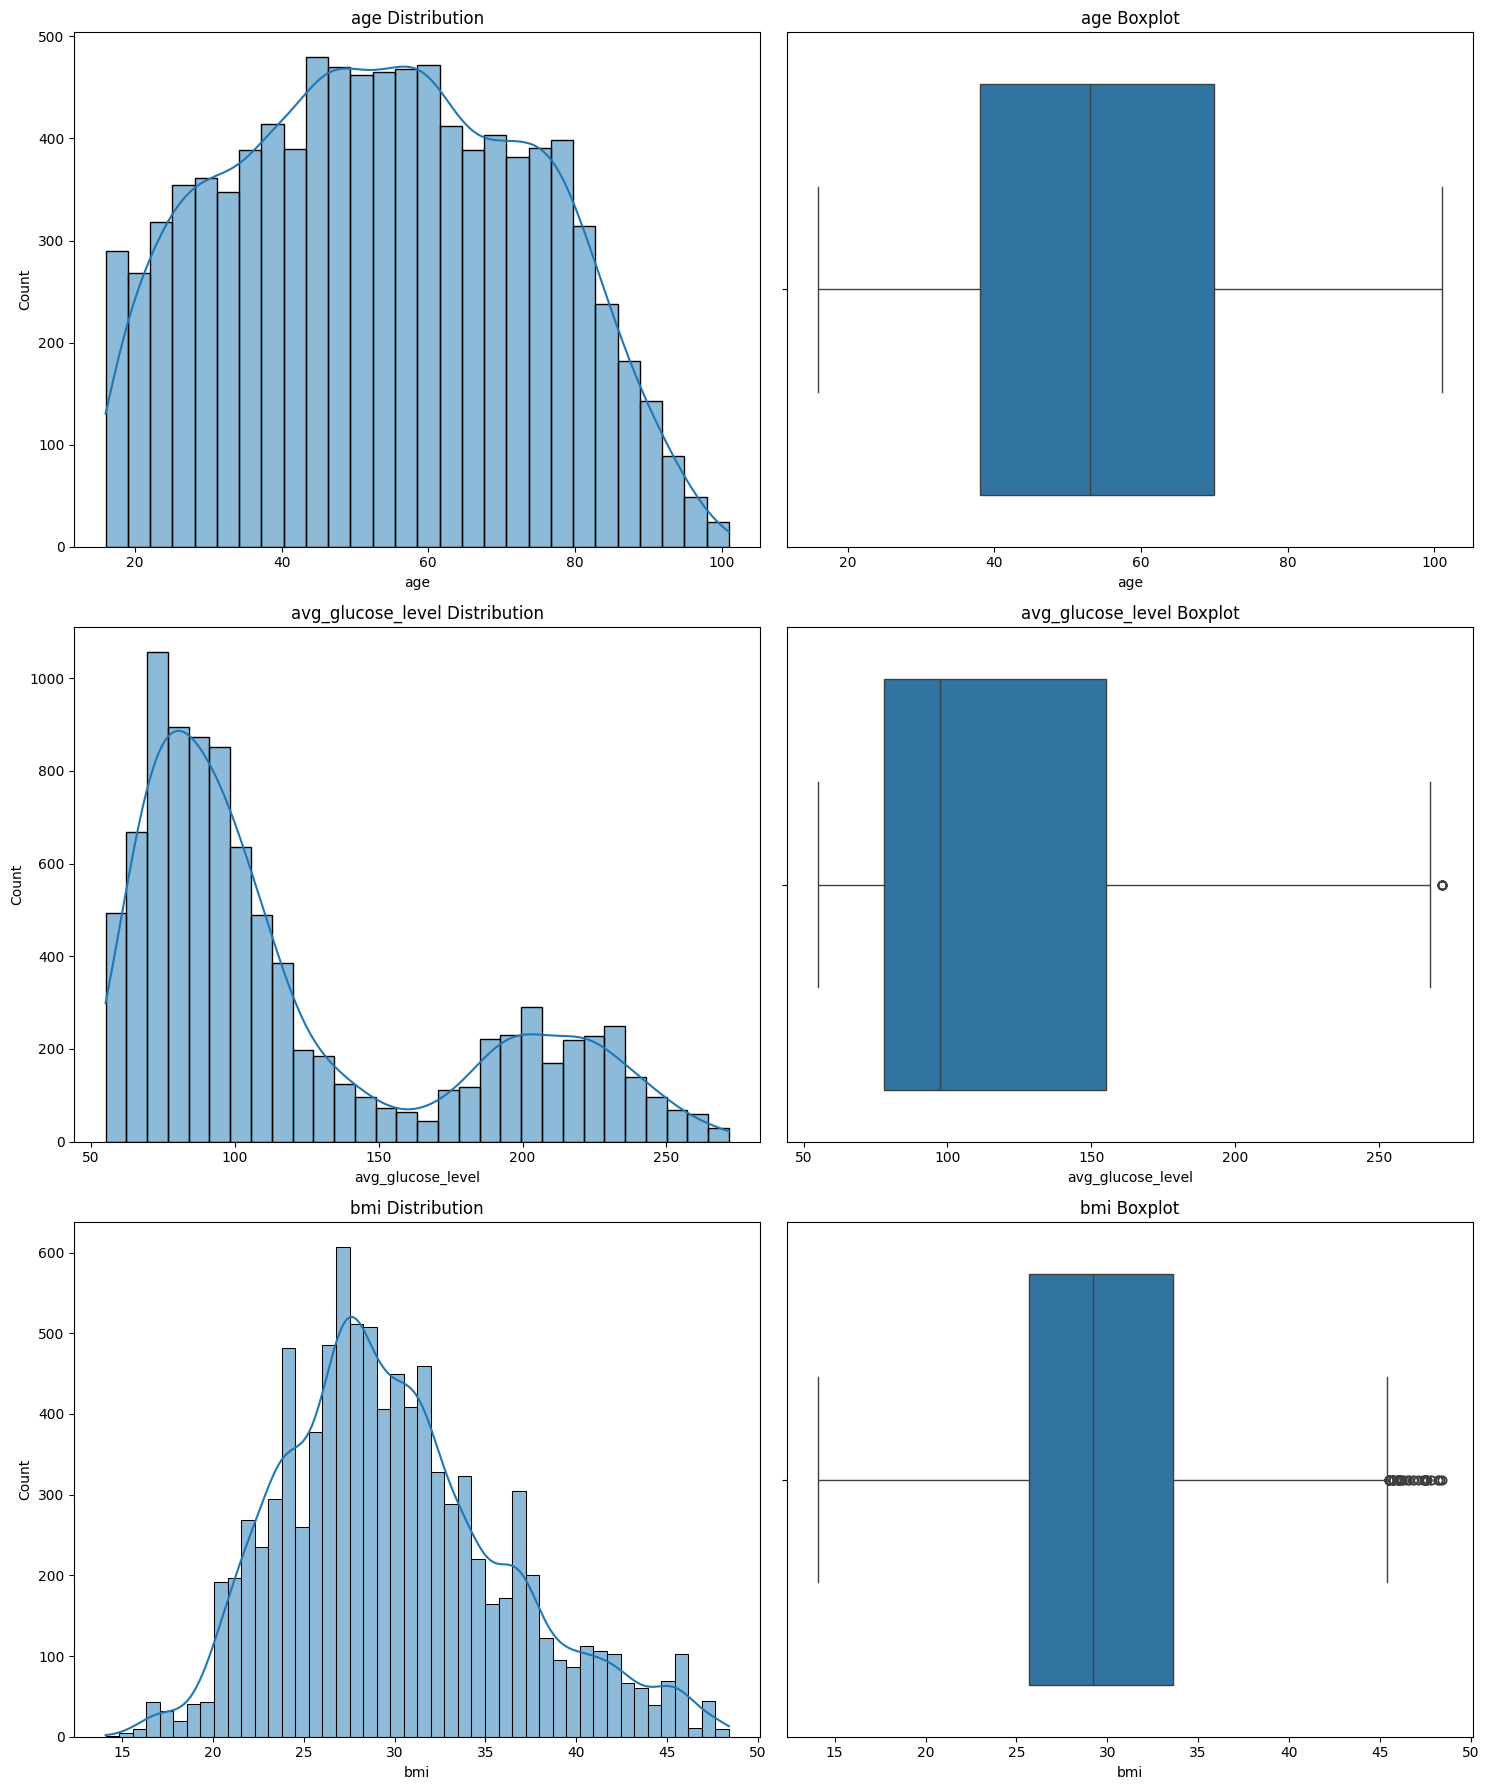

In [13]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


**Correlation matrix**

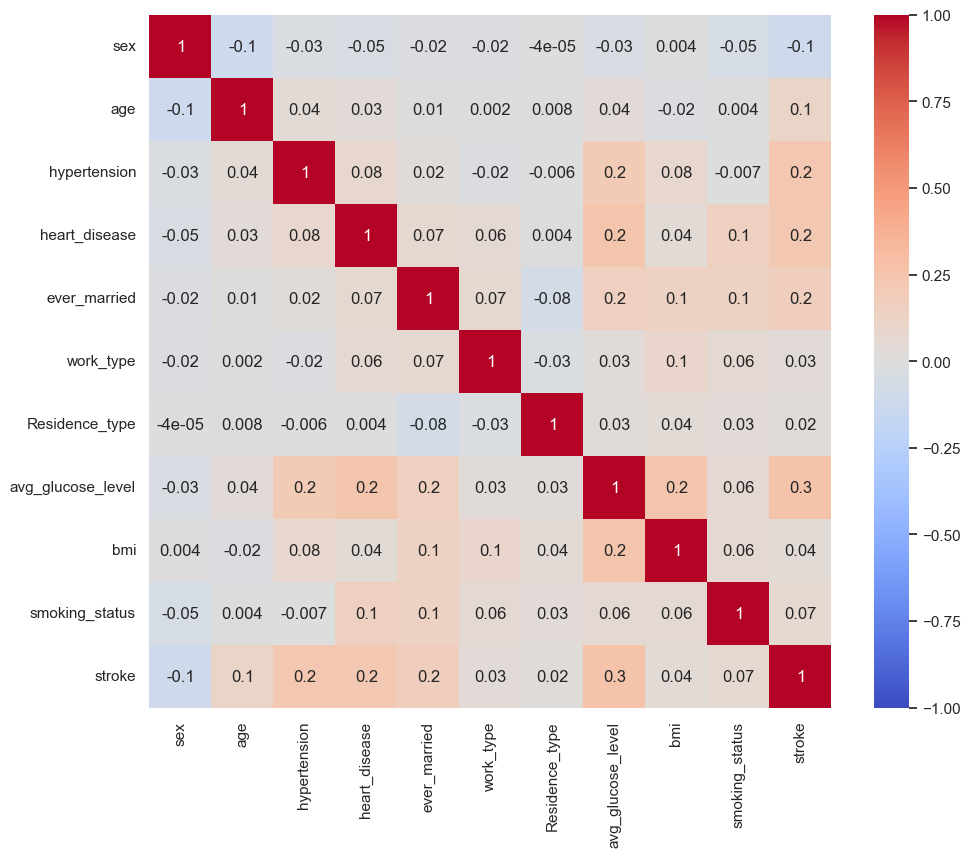

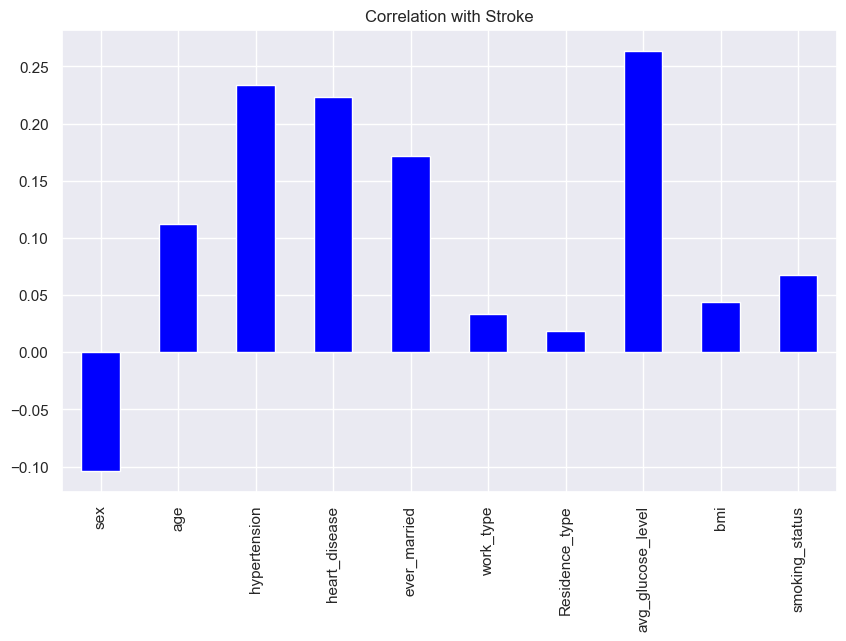

In [14]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

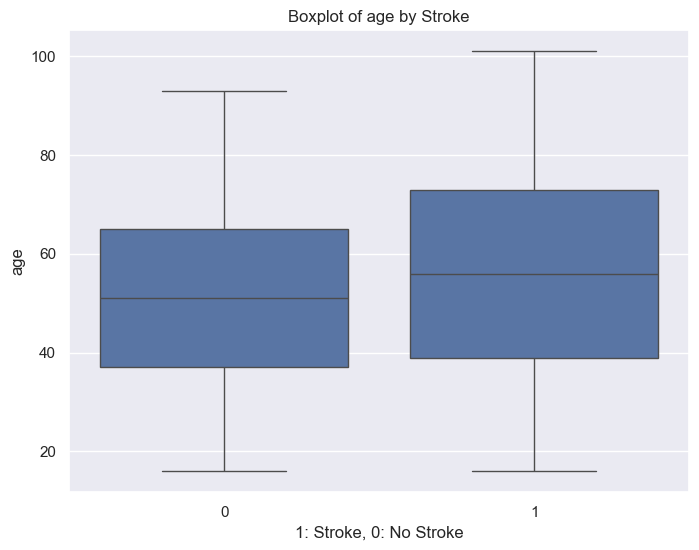

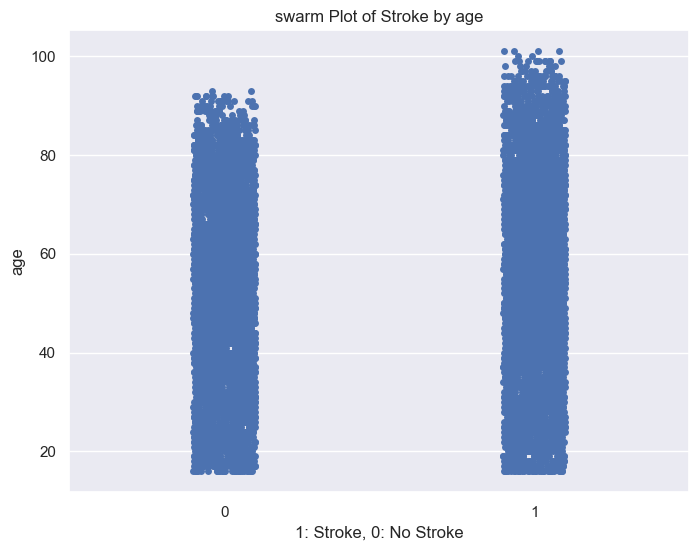

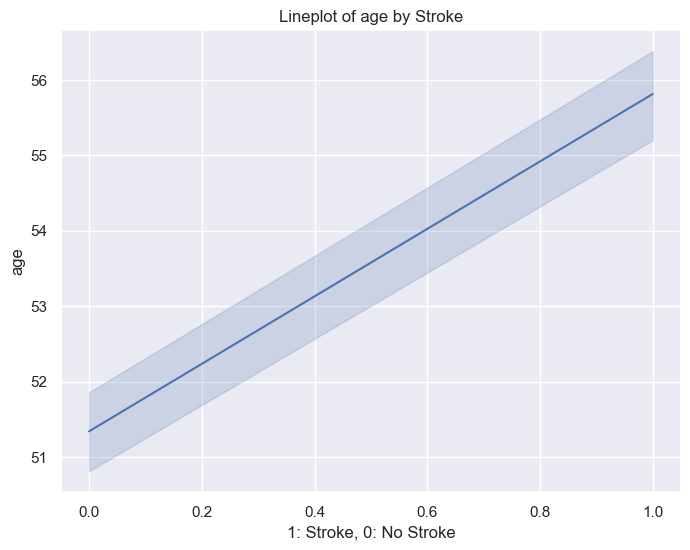

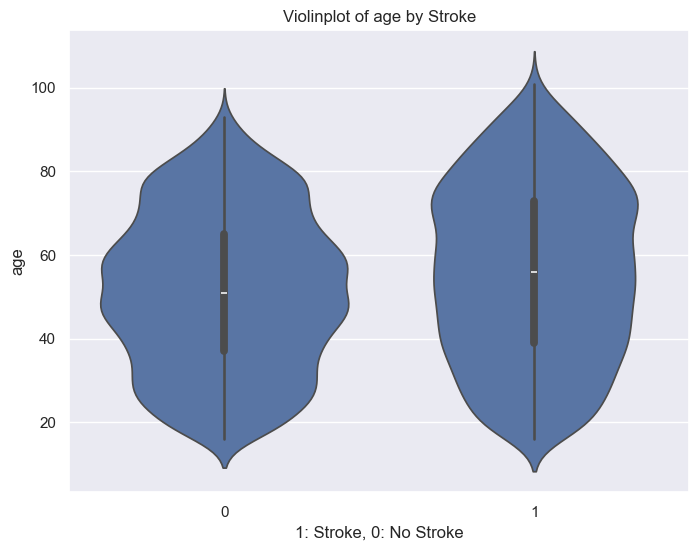

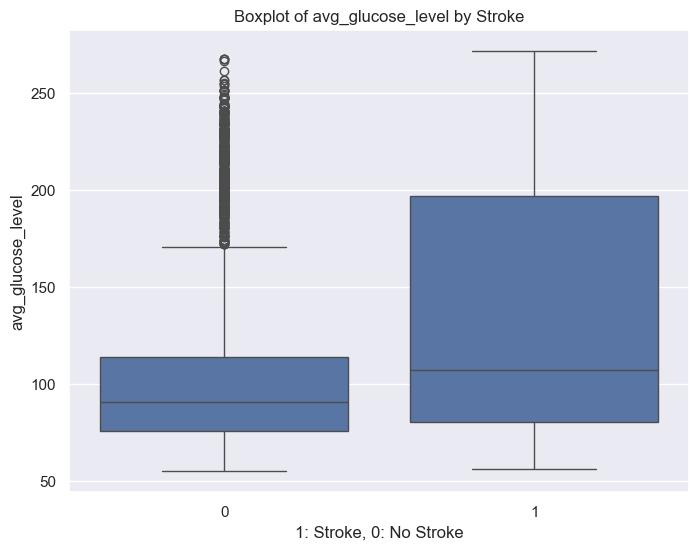

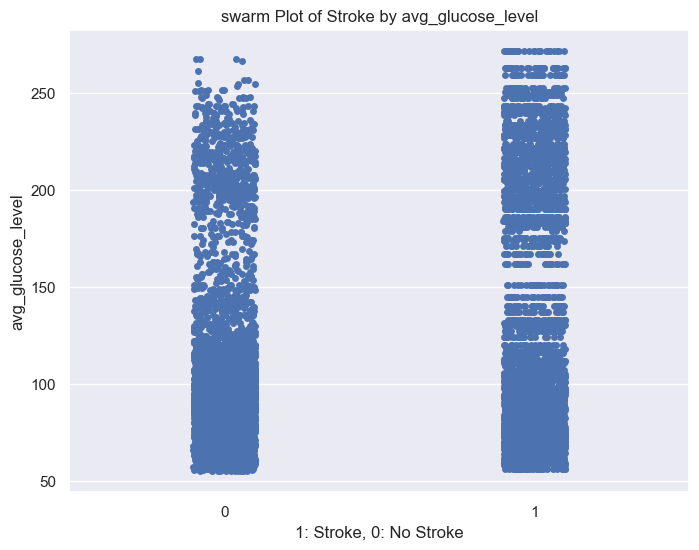

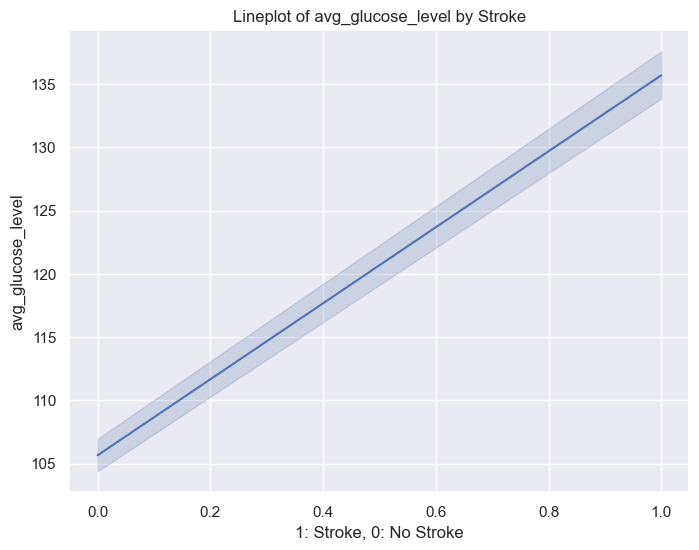

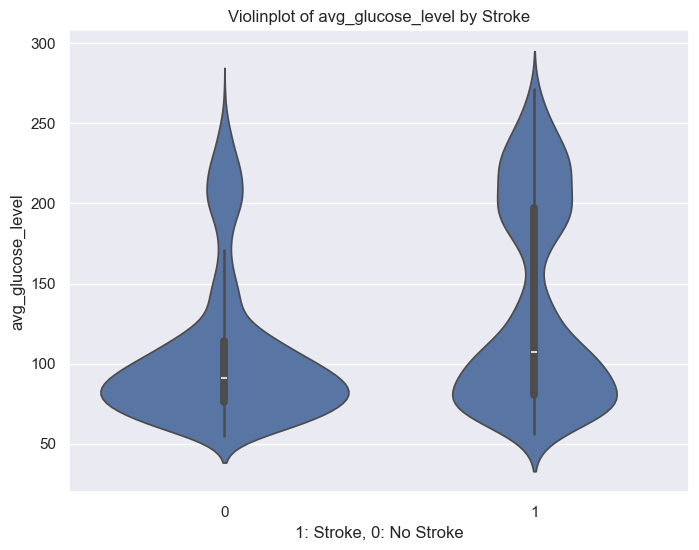

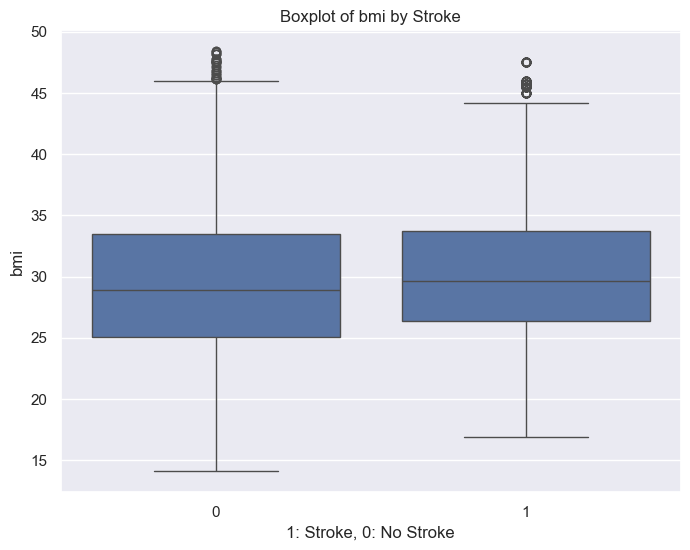

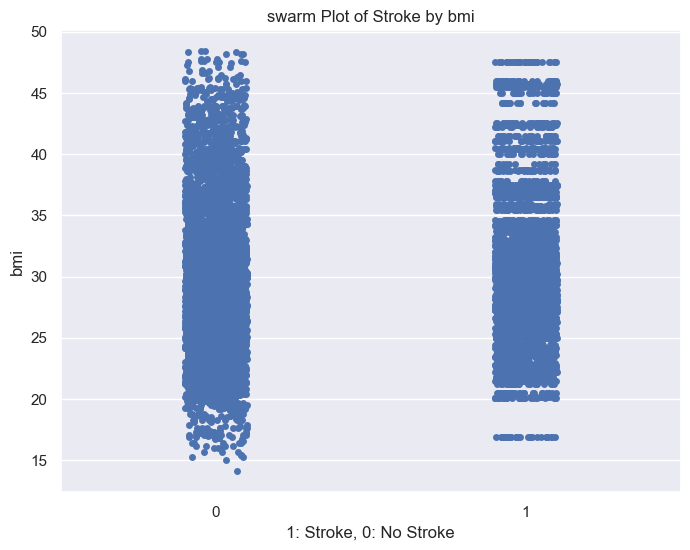

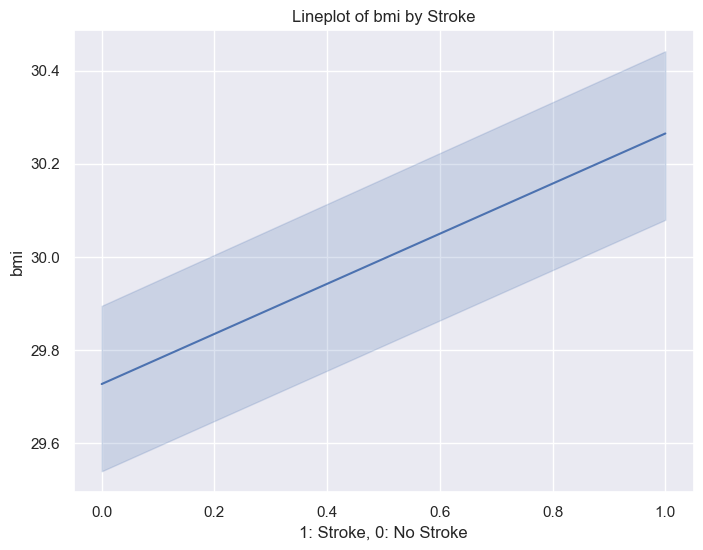

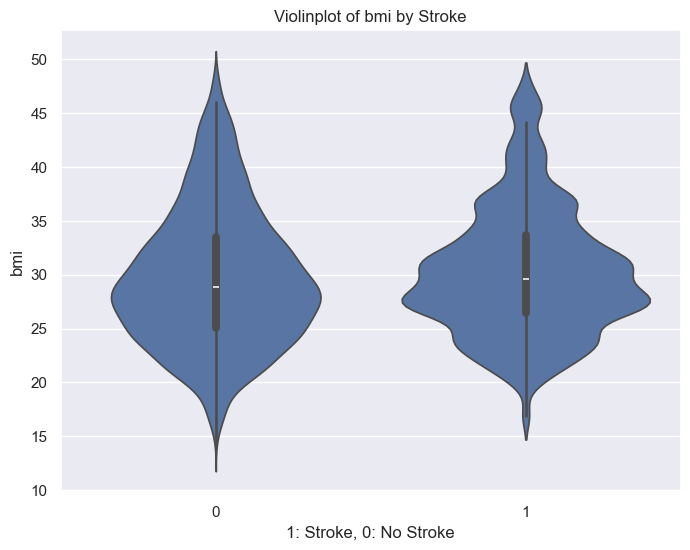

In [15]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1434
           1       0.77      0.95      0.85      1375

    accuracy                           0.84      2809
   macro avg       0.85      0.84      0.84      2809
weighted avg       0.86      0.84      0.84      2809

Node Labels:
 Annotation(0.645002, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


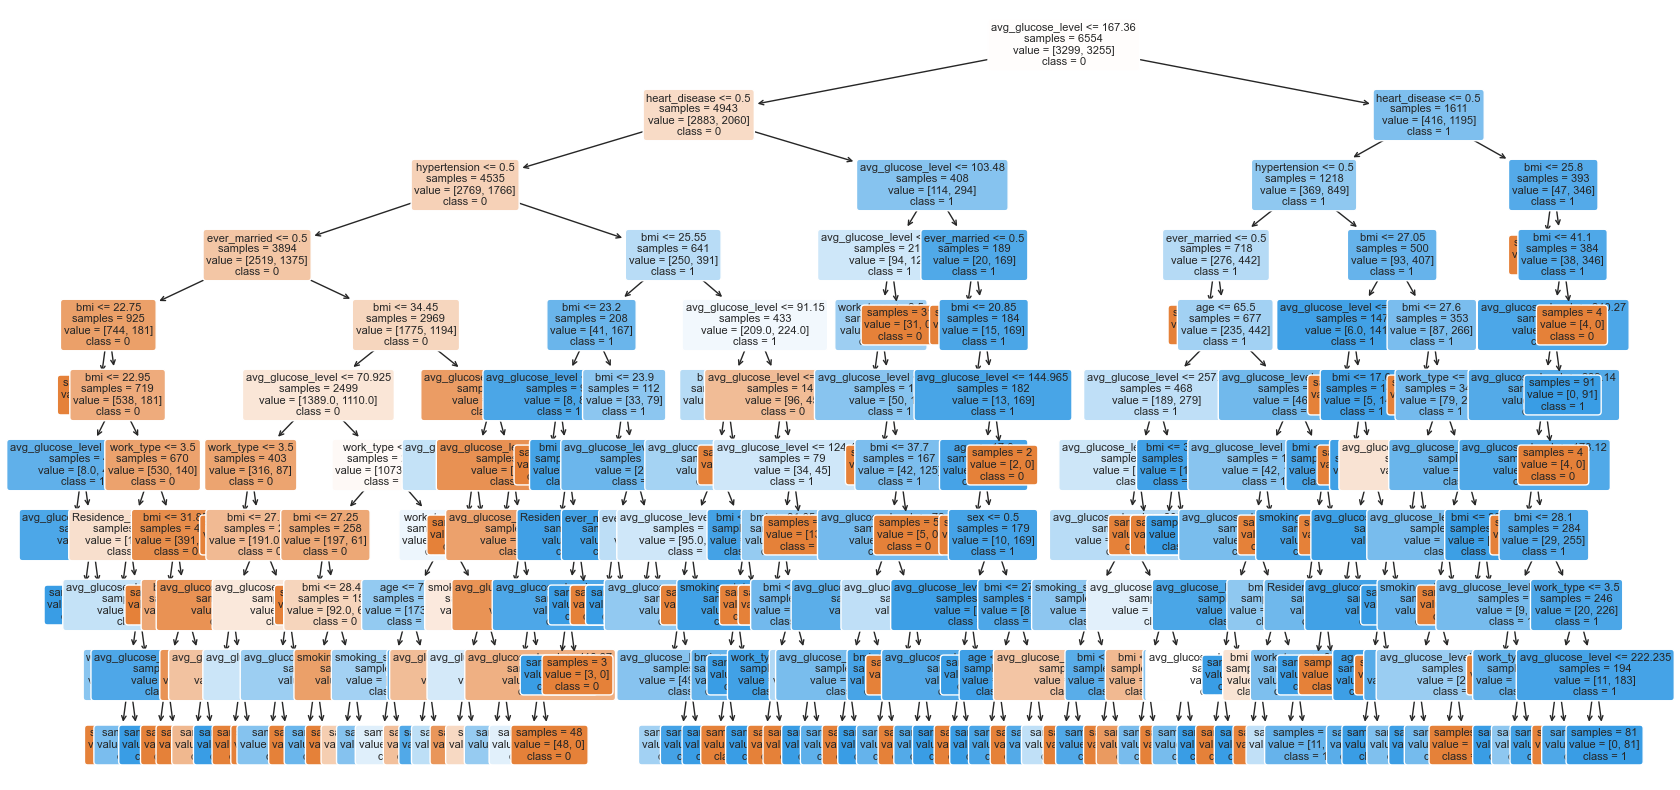

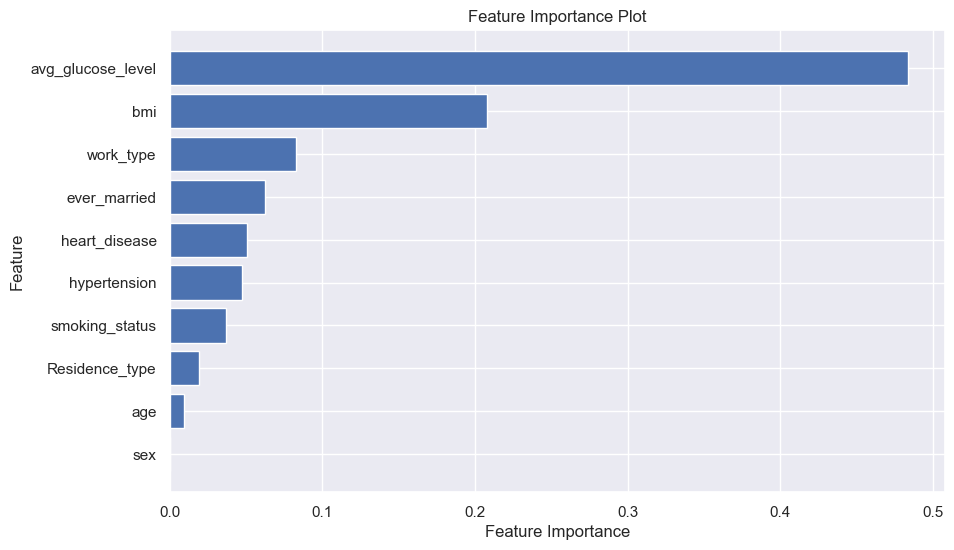

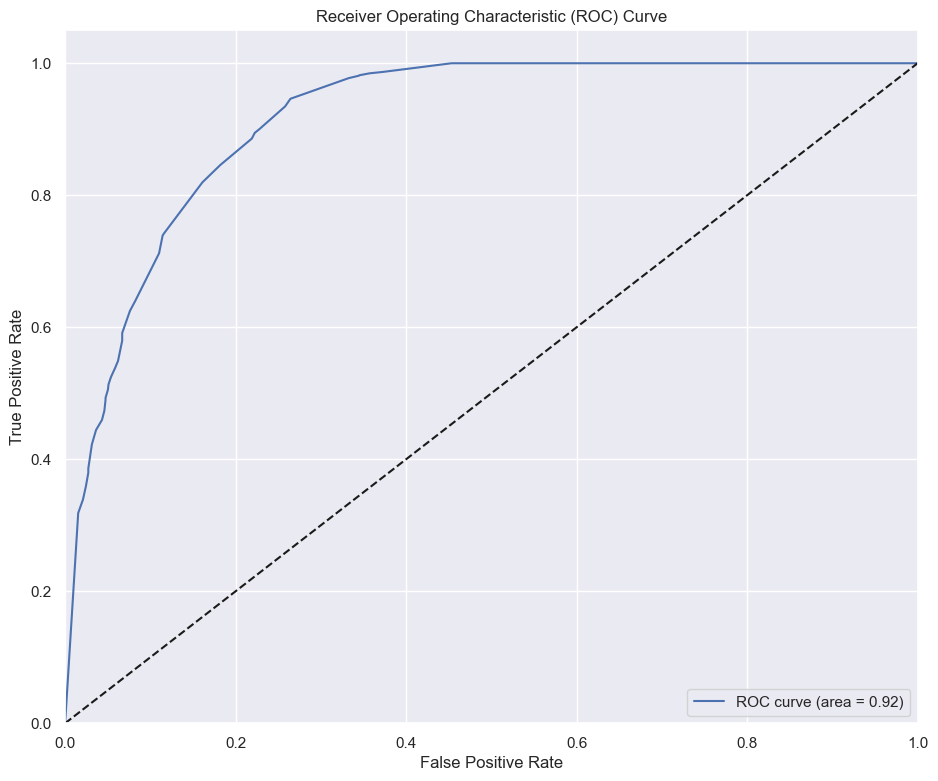

AUC Score: 0.9165213642703183


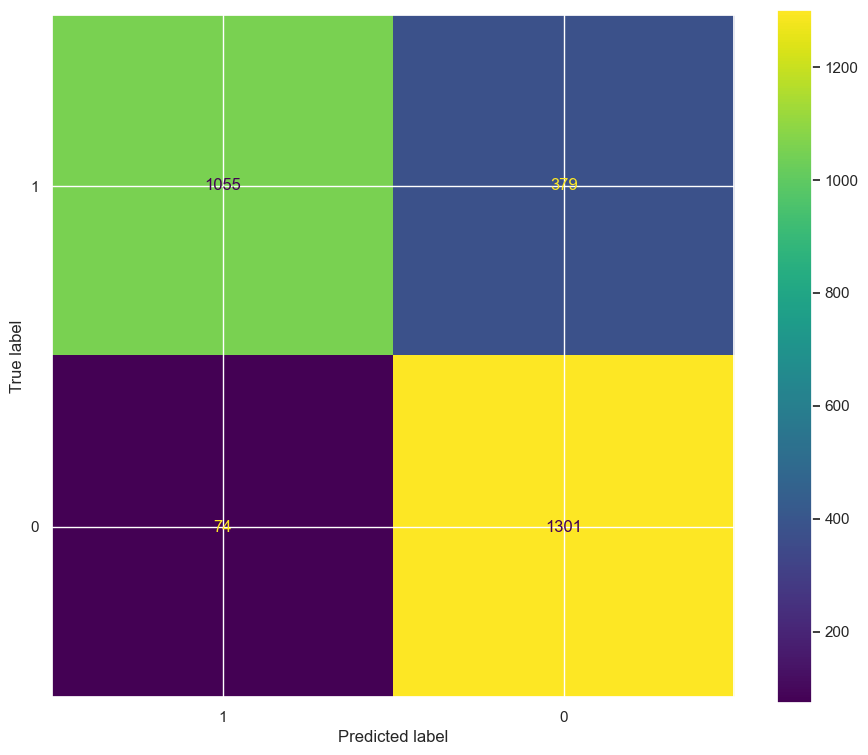

Accuracy for each fold: [0.8078291814946619, 0.8113879003558719, 0.8469750889679716, 0.7651245551601423, 0.8576512455516014, 0.8185053380782918, 0.8256227758007118, 0.8434163701067615, 0.7758007117437722, 0.7964285714285714]
Mean accuracy: 0.8148741738688358
95% confidence interval: (0.7932715169984608, 0.8364768307392108)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


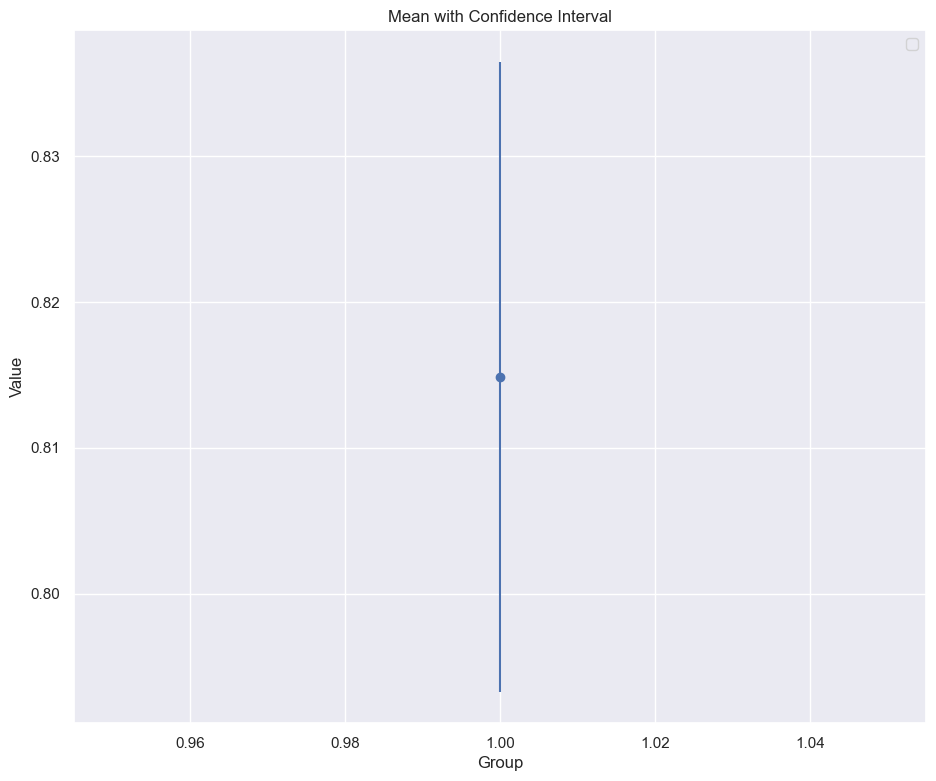


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1434
           1       0.80      0.89      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809



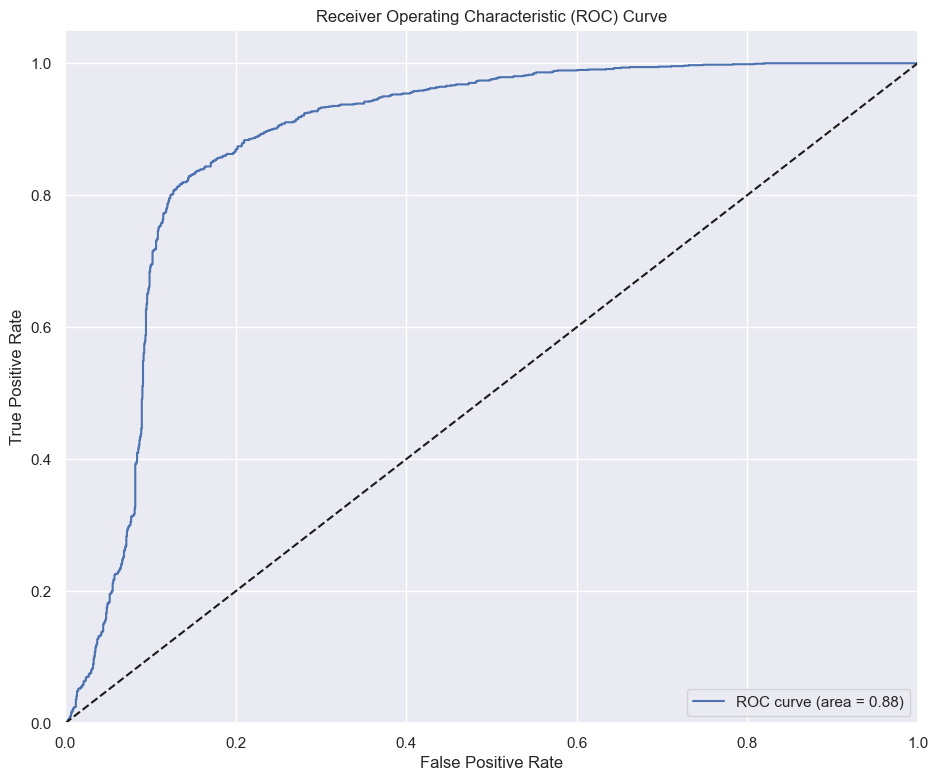

AUC Score: 0.8812907315836185


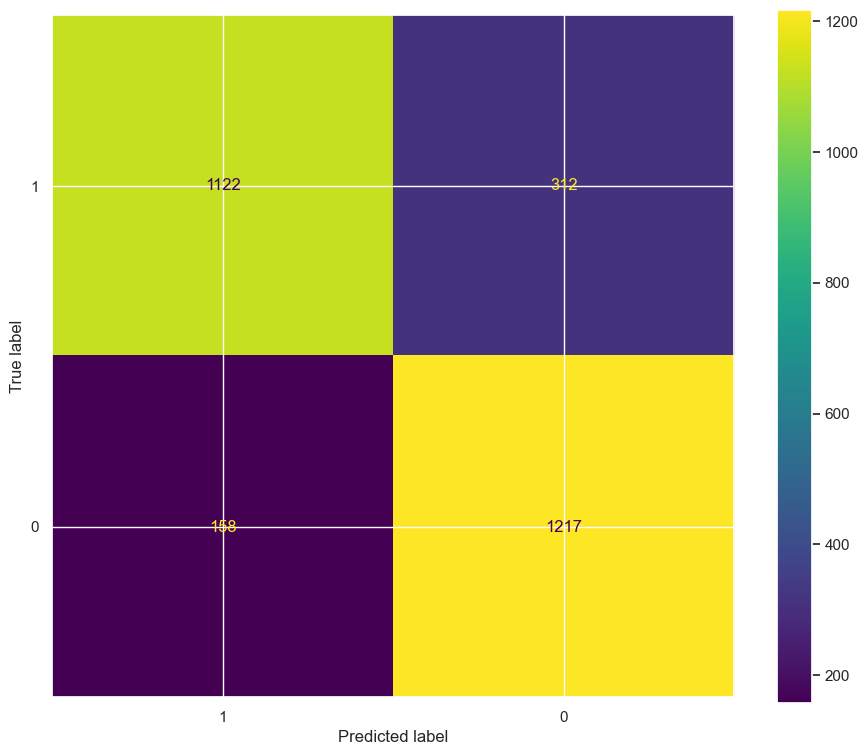

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.7722419928825622, 0.7829181494661922, 0.7722419928825622, 0.7046263345195729, 0.7900355871886121, 0.7508896797153025, 0.8113879003558719, 0.7793594306049823, 0.7678571428571429]
Mean accuracy: 0.7728711235383834
95% confidence interval: (0.7519779126778114, 0.7937643343989553)


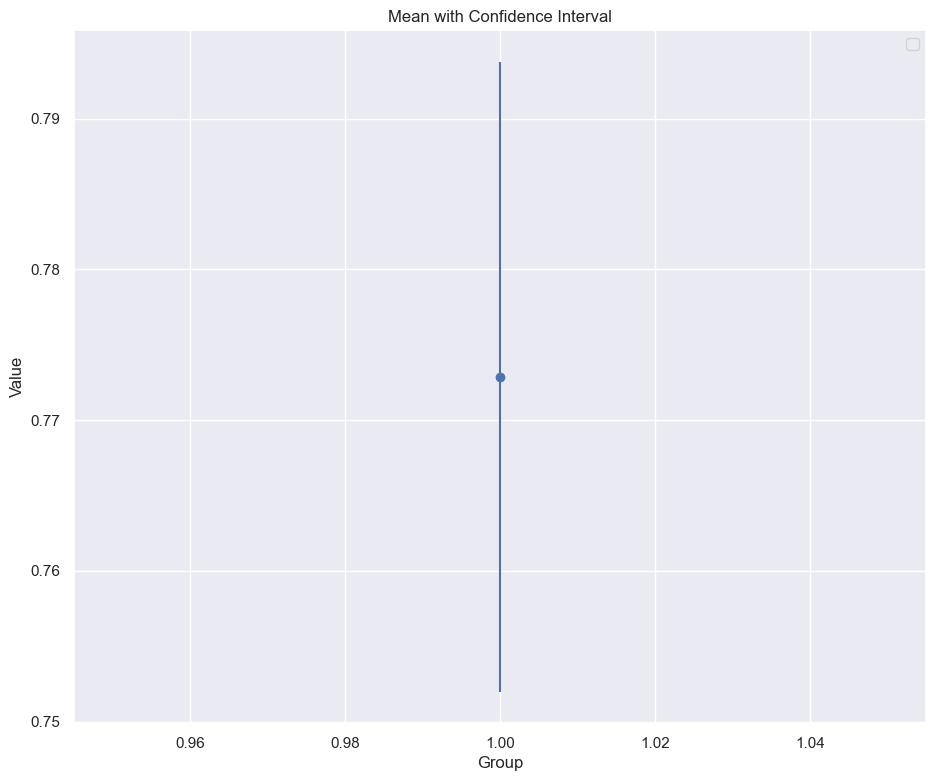

In [18]:
print('\n DECISION TREE PREDICTIONS AND RESULTS ')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df, df)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df, df)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df)